<a href="https://colab.research.google.com/github/Dharvi-k/DATA_ANALYSIS/blob/main/Hotek_booking_cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***An Exploratory Data Analysis to Identify Key Reasons Behind Booking Annihilation***

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# SET A SEED FOR REPRODUCABILITY
np.random.seed(42)

CREATE A HYPOTHETICAL DATASET


In [ ]:
n=500   #number of bookings

data={
    "Booking_id":np.arange(1,n+1),
    "is_canceled":np.random.choice([0,1],size=n,p=[0.7,0.3]),
    "lead_time":np.random.randint(1,365,size=n),
    "arrival_month":np.random.randint(1,13,size=n),
    "deposit_type":np.random.choice(["No Deposit", "Non Refund", "Refundable"],size=n,p=[0.8,0.15,0.05]),
    "customer_type":np.random.choice(["Transient", "Contract", "Group", "Transient-Party"], size=n),
    "required_car_parking_spaces":np.random.randint(1,3,size=n),
    "total_guests":np.random.randint(1,5,size=n),
    "is_repeated_guest":np.random.choice([0,1],size=n,p=[0.9,0.1])
}

df=pd.DataFrame(data)

In [ ]:
# MOVING THE DATA TO EXCEL SHEET
df.to_excel("hotel_booking_data.xlsx",index=False)

# PRININTING FIRST 5 SAMPLE OF OUR DATA
print(df.head())

   Booking_id  is_canceled  lead_time  arrival_month deposit_type  \
0           1            0        145              4   Non Refund   
1           2            1        201              6   No Deposit   
2           3            1        212              6   No Deposit   
3           4            0        220             12   No Deposit   
4           5            0        240              8   No Deposit   

  customer_type  required_car_parking_spaces  total_guests  is_repeated_guest  
0      Contract                            1             3                  0  
1     Transient                            1             3                  0  
2         Group                            1             4                  0  
3     Transient                            2             3                  0  
4         Group                            1             3                  0  


GET BASIC INFO AND SUMMARY

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Booking_id                   500 non-null    int64 
 1   is_canceled                  500 non-null    int64 
 2   lead_time                    500 non-null    int64 
 3   arrival_month                500 non-null    int64 
 4   deposit_type                 500 non-null    object
 5   customer_type                500 non-null    object
 6   required_car_parking_spaces  500 non-null    int64 
 7   total_guests                 500 non-null    int64 
 8   is_repeated_guest            500 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 35.3+ KB
None


In [ ]:
# SUMMARY STATISCTICS FOR NUMERIC COLUMNS
print(df.describe())

       Booking_id  is_canceled   lead_time  arrival_month  \
count  500.000000   500.000000  500.000000     500.000000   
mean   250.500000     0.308000  181.468000       6.444000   
std    144.481833     0.462129  107.544002       3.476065   
min      1.000000     0.000000    1.000000       1.000000   
25%    125.750000     0.000000   91.500000       3.000000   
50%    250.500000     0.000000  179.000000       7.000000   
75%    375.250000     1.000000  282.250000       9.000000   
max    500.000000     1.000000  364.000000      12.000000   

       required_car_parking_spaces  total_guests  is_repeated_guest  
count                   500.000000    500.000000         500.000000  
mean                      1.534000      2.474000           0.104000  
std                       0.499342      1.131319           0.305566  
min                       1.000000      1.000000           0.000000  
25%                       1.000000      1.000000           0.000000  
50%                       2.00

In [ ]:
# CHECK FOR MISSING VALUES
print(df.isnull().sum())

Booking_id                     0
is_canceled                    0
lead_time                      0
arrival_month                  0
deposit_type                   0
customer_type                  0
required_car_parking_spaces    0
total_guests                   0
is_repeated_guest              0
dtype: int64


In [ ]:
# UNDERSTAND UNIQUE VALUES IN COLUMNS
print(df["customer_type"].value_counts())
print(df["deposit_type"].value_counts())
print(df["is_canceled"].value_counts())

customer_type
Transient-Party    134
Transient          131
Contract           124
Group              111
Name: count, dtype: int64
deposit_type
No Deposit    413
Non Refund     64
Refundable     23
Name: count, dtype: int64
is_canceled
0    346
1    154
Name: count, dtype: int64


**Analyze Reasons for Cancellations**


*“What factors are linked to cancellations?”

We’ll:

1.Compare average values for canceled vs. non-canceled bookings

2.Use visualizations to find patterns *

In [ ]:
df.groupby('is_canceled').mean(numeric_only=True)

,Booking_id,lead_time,arrival_month,required_car_parking_spaces,total_guests,is_repeated_guest
is_canceled,,,,,,
0,247.352601,179.526012,6.387283,1.528902,2.445087,0.101156
1,257.571429,185.831169,6.571429,1.545455,2.538961,0.110390


What do we learn from all this?
Lead time is the biggest clue — longer wait = more cancellations.

Other features don’t show strong patterns yet but we might get more insights if we check:

deposit_type

customer_type

previous_cancellations

 Step 1: Use value_counts() to see deposit types

In [ ]:
df['deposit_type'].value_counts()

,count
deposit_type,
No Deposit,413
Non Refund,64
Refundable,23


 Step 2: Use groupby() to compare deposit type with cancellations

In [ ]:
df.groupby('deposit_type')['is_canceled'].value_counts(normalize=True)  #normalize=True shows percentages, which is easier to understand.

deposit_type  is_canceled
No Deposit    0              0.675545
              1              0.324455
Non Refund    0              0.828125
              1              0.171875
Refundable    0              0.608696
              1              0.391304
Name: proportion, dtype: float64

🧾 Summary:

Refundable deposits → most risky

Non Refundable deposits → people tend to show up

No Deposit is somewhere in the middle


**we check customer_type and how it affects cancellations?**

In [ ]:
df['customer_type'].value_counts()

,count
customer_type,
Transient-Party,134
Transient,131
Contract,124
Group,111


In [ ]:
df.groupby('customer_type')['is_canceled'].value_counts(normalize=True)

customer_type    is_canceled
Contract         0              0.709677
                 1              0.290323
Group            0              0.702703
                 1              0.297297
Transient        0              0.694656
                 1              0.305344
Transient-Party  0              0.664179
                 1              0.335821
Name: proportion, dtype: float64

 🧾Summary:

📌 Transient-Party = most cancellations

📌 Contract = most reliable customers

📌 So, marketing team should target contracts, and maybe double-confirm
with Transient-Party bookings

# ***we move on to analyzing lead time and whether early bookings are more likely to cancel?***

lead_time = number of days between booking date and arrival date

So we’ll now check:


“Are cancellations more common when lead_time is high?”

In [ ]:
df.groupby('is_canceled')['lead_time'].mean()

,lead_time
is_canceled,
0,179.526012
1,185.831169


People who did not cancel usually booked about 179 days early.

People who did cancel booked about 186 days early.

On average, people who book earlier are slightly more likely to cancel.

*“The average lead time for canceled bookings (185.83 days) is slightly higher than for non-canceled bookings (179.53 days), suggesting that bookings made well in advance may have a higher risk of cancellation.”*




**Let’s now analyze the next column:** **arrival_month**


In [ ]:
df.groupby("arrival_month")["is_canceled"].mean().sort_index()

,is_canceled
arrival_month,
1,0.250000
2,0.244898
3,0.377778
4,0.250000
5,0.348837
6,0.272727
7,0.347826
8,0.270833
9,0.380952


 Interpretation:

Highest cancellations happen in October (43%), September (38%), and March (38%).

Lowest cancellations are in February (24.5%), January (25%), and April (25%).*italicized text*

***Let’s plot the cancellation rate by month using matplotlib***

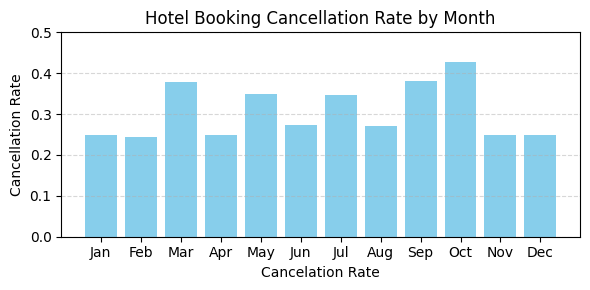

In [ ]:
import matplotlib.pyplot as plt
cancel_rate_by_month={
    1: 0.250000,
    2: 0.244898,
    3: 0.377778,
    4: 0.250000,
    5: 0.348837,
    6: 0.272727,
    7: 0.347826,
    8: 0.270833,
    9: 0.380952,
    10: 0.428571,
    11: 0.250000,
    12: 0.250000
}
# Separate keys and values
#This is because Matplotlib needs separate x and y values to make a chart.
months=list(cancel_rate_by_month.keys())
rates=list(cancel_rate_by_month.values())

# months label
month_label=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#plotting
plt.figure(figsize=(6,3))
plt.bar(month_label,rates,color='skyblue')
plt.title('Hotel Booking Cancellation Rate by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xlabel('Cancelation Rate')
plt.ylim(0,0.5)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()


: Create lead time ranges (buckets)
We’ll divide lead times into categories like:

Short (0–30 days)

Medium (31–90 days)

Long (91–180 days)

Very Long (181+ days)

In [ ]:
def lead_time_bucket(days):
  if days<=30:
    return 'short(0-30)'
  elif days <= 90:
      return 'Medium (31-90)'
  elif days <= 180:
      return 'Long (91-180)'
  else:
      return 'Very Long (181+)'

In [ ]:

# Apply this function to create a new column
df['lead_time_category']=df['lead_time'].apply(lead_time_bucket)

# Group by this category and calculate average cancellation
lead_time_cancellation=df.groupby('lead_time_category')['is_canceled'].mean()

# Show the result
print(lead_time_cancellation)

lead_time_category
Long (91-180)       0.333333
Medium (31-90)      0.256410
Very Long (181+)    0.317073
short(0-30)         0.276596
Name: is_canceled, dtype: float64


Plot it

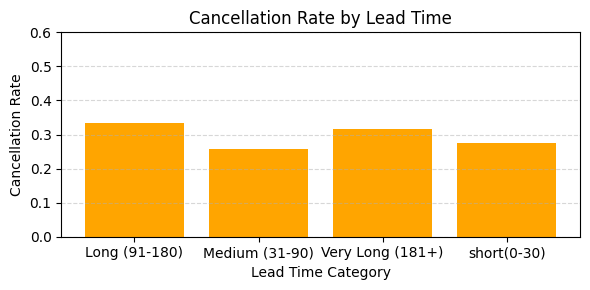

In [ ]:
# Plotting the cancellation rate by lead time category
lead_time_cancellation=lead_time_cancellation.sort_index()

plt.figure(figsize=(6,3))
x_labels=lead_time_cancellation.index.astype(str)
plt.bar(x_labels, lead_time_cancellation.values,color='orange')
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time Category')
plt.ylabel('Cancellation Rate')
plt.ylim(0, 0.6)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

 Let's now analyze how deposit type affects booking cancellations

In [ ]:
print(df['deposit_type'].unique())

['Non Refund' 'No Deposit' 'Refundable']


In [ ]:
deposit_cancellation=df.groupby('deposit_type')['is_canceled'].mean()
print(deposit_cancellation)

deposit_type
No Deposit    0.324455
Non Refund    0.171875
Refundable    0.391304
Name: is_canceled, dtype: float64


 Visualize using a bar chart

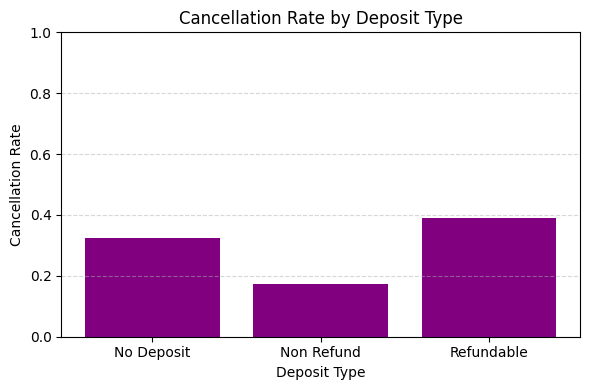

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(deposit_cancellation.index,deposit_cancellation.values,color="purple")
plt.title('Cancellation Rate by Deposit Type')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.ylim(0, 1)
plt.grid(axis='y',linestyle="--",alpha=0.5)
plt.tight_layout()
plt.show()


Analyze Customer Type vs Cancellation

This helps answer:


“Do certain customer types cancel more than others?”

✅ Step 1: View unique values in customer_type
python
Copy code


In [ ]:
print(df['customer_type'].unique())

['Contract' 'Transient' 'Group' 'Transient-Party']


✅ Step 2: Group and get cancellation rate

In [ ]:
customer_type_cancellation=df.groupby('customer_type')['is_canceled'].mean()
print(customer_type_cancellation)

customer_type
Contract           0.290323
Group              0.297297
Transient          0.305344
Transient-Party    0.335821
Name: is_canceled, dtype: float64


Now plot the data

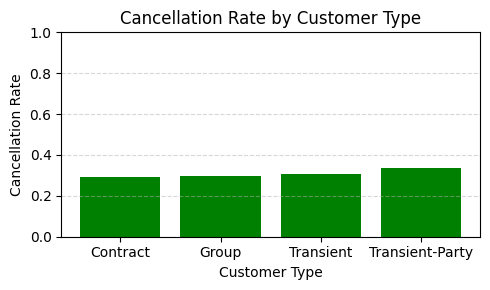

In [ ]:
plt.figure(figsize=(5,3))
plt.bar(customer_type_cancellation.index,customer_type_cancellation.values,color="green")
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.ylim(0,1)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

**What This Graph Tells Us**

All types (Contract, Group, Transient, Transient-Party) have similar cancellation rates — around 30%.


But Transient-Party customers seem to cancel slightly more than the rest.


Contract customers have the lowest cancellation rate, meaning these bookings are more likely to be confirmed and honored.

Conclusion:

"The type of customer affects cancellations slightly. Contract customers cancel the least, while Transient-Party customers cancel the most — but the difference is not huge."

# *** Hotel Booking Cancellation Analysis – Summary Report***

Key Columns:

lead_time: Number of days between booking and check-in


deposit_type: Type of deposit required


customer_type: Type of guest (e.g., Contract, Transient)


is_canceled: Whether the booking was canceled (1) or not (0)


🔍 Key Findings:

1.Cancellation vs. Lead Time
Bookings with longer lead time tend to get canceled more.

2.People booking far in advance may change plans later, leading to cancellations.